In [1]:
%matplotlib inline

import os 
import sys 
import time
import hashlib

from datetime  import datetime 

import numpy as np  # learn 
import pandas as pd # learn
from pandas import *
from numpy import *

from scipy import stats # look at scipy
from scipy import linalg
from scipy import *

 
import matplotlib as mplt # learn matplolib 
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

# import seaborn as sns 
# sns.set_style("whitegrid")
# sns.set(rc={"figure.figsize": (14, 6)})

import IPython
from IPython.display import display


import matplotlib
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
 
# import sklearn as sk
import itertools
import pickle


# from pyspark import SparkContext, SparkConf
# from pyspark.sql import SQLContext
# from pyspark.sql.types import *

# from pyspark.mllib.regression import LabeledPoint


In [2]:
# block1: Training dataset

# load and extract yahoo data
# choose the data in files real_11-20, which contains a time series (data point 3000 - 10000) with mediate 
#  outlier magnitude 

#  this dataset will be used for realtime training RNN 
# 6,13,15,11,22,29,56,31,39,57,43,65, 55,62


# 13 23 29 44
# final chosen one: 2,3

figsize= ( 15.4,7)

def value_drift_observe( ts, file_name ):
    valDrift =  [ ts[i+1]-ts[i] for i in range(len(ts)-1) ]
    
    fig = plt.figure()
    figure_size= figsize
    fig.set_size_inches( figure_size )

    axes = plt.gca()
#     axes.set_xlim([1, len(ts)+10])
#     axes.set_ylim([-2000,maxval+2000])

    plt.plot( valDrift, label='value drifts: x_t - t_(t-1)' )
# plt.plot( list( clean_tdf['value']), color='g' )
# plt.scatter( list(outlier_tdf['timestamp']),list(outlier_tdf['value']), color='red',\
#              label='Outliers')
# plt.xticks([1,2,3,4,5], ['5','10','15','20','25'] )
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


# axes.xaxis.set_ticks( ['5m', '10m', '15m','20m'] ) 
# axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title('Value drift in ' + file_name )
    plt.ylabel('Value')
    plt.xlabel('Time')
# plt.legend( loc='upper left',fontsize=12 )
    plt.legend() 
    
def diff_drift_observe( ts, file_name ):
    valDrift =  [ (abs(ts[i+1]-ts[i])+abs(ts[i-1]-ts[i]))/2.0 for i in range(1,len(ts)-1) ]
    
    fig = plt.figure()
    figure_size= figsize
    fig.set_size_inches( figure_size )

    axes = plt.gca()
#     axes.set_xlim([1, len(ts)+10])
#     axes.set_ylim([-2000,maxval+2000])

    plt.plot( range(1,len(ts)-1 ) ,  valDrift, label='value drifts: x_t - t_(t-1)' )
# plt.plot( list( clean_tdf['value']), color='g' )
# plt.scatter( list(outlier_tdf['timestamp']),list(outlier_tdf['value']), color='red',\
#              label='Outliers')
# plt.xticks([1,2,3,4,5], ['5','10','15','20','25'] )
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


# axes.xaxis.set_ticks( ['5m', '10m', '15m','20m'] ) 
# axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title('Value drift in ' + file_name )
    plt.ylabel('Value')
    plt.xlabel('Time')
# plt.legend( loc='upper left',fontsize=12 )
    plt.legend()
    
def yahoo_load_data( fileNo,  dta_folder):
    
    is_clean=0
    
    tmpdf= pd.read_csv( dta_folder + str(fileNo) + ".csv")
    tmpdf.drop('timestamp', axis=1, inplace=True)
    tmp_col=  range( 1, tmpdf.shape[0]+1 ) 
    tmpdf.insert(0, 'timestamp', tmp_col)
    tdf= tmpdf
        
    maxval= max(tdf['value'])
    minval= min(tdf['value'])

    outlier_tdf= tdf[ tdf['is_anomaly'] ==1  ]
    clean_tdf =  tdf[ tdf['is_anomaly'] ==0  ]

    if is_clean==1:
        ts= clean_tdf['value']
    else:
        ts= tdf['value']
    
    ts_flag= list(tdf['is_anomaly'])

#     print "size of clean data:",clean_tdf.shape
#     print "size of noisy data:", ts.shape, len(ts_flag)
#     print outlier_tdf
    
    # .............plot.................

    matplotlib.rcParams.update({'font.size': 15})
    figure_size= figsize
    legend_font= 8.5
    fig = plt.figure()
    fig.set_size_inches( figure_size )

    axes = plt.gca()
    axes.set_xlim([1, tdf.shape[0]+10])
    # axes.set_ylim([-2000,maxval+2000])

    plt.plot( list( tdf['value']), label='Normal data' )
    # plt.plot( list( clean_tdf['value']), color='g' )
    plt.scatter( list(outlier_tdf['timestamp']),list(outlier_tdf['value']), color='red',\
             label='Outliers', marker='+', s=60)
    # plt.xticks([1,2,3,4,5], ['5','10','15','20','25'] )
    # plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


    # axes.xaxis.set_ticks( ['5m', '10m', '15m','20m'] ) 
    # axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title('Yahoo Real Data ('+'files: real_' + str(fileNo) +')')
    plt.ylabel('Value')
    plt.xlabel('Time')
    # plt.legend( loc='upper left',fontsize=12 )
    plt.legend(loc='upper left')
    #     bbox_to_anchor=(0., 1.0, 1., .10),
    #            loc=0,
    #            ncol=5, mode="expand", borderaxespad=0., fontsize= legend_font , numpoints=1 )

#     value_drift_observe( list(tdf['value']), 'real_'+str(fileNo) )  
    
    #     fig.savefig('example_ts.pdf', format='pdf', bbox_inches='tight')
    
    
    
#     fig = plt.figure()
#     fig.set_size_inches( figure_size )

#     axes = plt.gca()
#     axes.set_xlim([1, tdf.shape[0]+10])
#     # axes.set_ylim([-2000,maxval+2000])

#     plt.plot( list( tdf['value']), label='Normal data' )
#     # plt.plot( list( clean_tdf['value']), color='g' )
#     plt.scatter( list(outlier_tdf['timestamp']),list(outlier_tdf['value']), color='red',\
#              label='Outliers', marker='+', s=60)
#     # plt.xticks([1,2,3,4,5], ['5','10','15','20','25'] )
#     # plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


#     # axes.xaxis.set_ticks( ['5m', '10m', '15m','20m'] ) 
#     # axes.xaxis.set_major_locator(MaxNLocator(integer=True))
#     plt.title('Yahoo Real Data ('+'files: real_' + str(fileNo) +')')
#     plt.ylabel('Value')
#     plt.xlabel('Time')
#     # plt.legend( loc='upper left',fontsize=12 )
#     plt.legend(loc='upper left')
    
    
    
    return ts, ts_flag
    
    
# ax.annotate('local max', xy=(3, 1),  xycoords='data',
#             xytext=(0.8, 0.95), textcoords='axes fraction',
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             horizontalalignment='right', verticalalignment='top',
#             )

def plot_outlier( ts_t, ts_val, out_t, out_val, dataset_name):
    
    matplotlib.rcParams.update({'font.size': 15})
    figure_size= figsize
    legend_font= 8.5
    fig = plt.figure()
    fig.set_size_inches( figure_size )

    axes = plt.gca()
#     axes.set_xlim([1, tdf.shape[0]+10])
    # axes.set_ylim([-2000,maxval+2000])

    plt.plot( ts_t, ts_val ,label='Normal data' )
    # plt.plot( list( clean_tdf['value']), color='g' )
    plt.scatter( out_t ,out_val, color='red',label='Outliers')
    # plt.xticks([1,2,3,4,5], ['5','10','15','20','25'] )
    # plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    # axes.xaxis.set_ticks( ['5m', '10m', '15m','20m'] ) 
    # axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title(dataset_name)
    plt.ylabel('Value')
    plt.xlabel('Time')
    # plt.legend( loc='upper left',fontsize=12 )
    plt.legend(loc='upper left')
    #     bbox_to_anchor=(0., 1.0, 1., .10),
    #            loc=0,
    #            ncol=5, mode="expand", borderaxespad=0., fontsize= legend_font , numpoints=1 )

#     value_drift_observe( ts_val , dataset_name )  

    #     fig.savefig('example_ts.pdf', format='pdf', bbox_inches='tight')
    
def plot_outlier_cp( ts_t, ts_val, out_t, out_val, cp_t,cp_val, dataset_name):
    
    matplotlib.rcParams.update({'font.size': 15})
    figure_size= figsize
    legend_font= 8.5
    
    
    fig = plt.figure()
    fig.set_size_inches( figure_size )

    ax1 = plt.gca()
    ax1.set_xlim( 1, len(ts_t))
    # axes.set_ylim([-2000,maxval+2000])
    
    if len(cp_t) >0:
        tmpcp= [ i  for i in cp_t]
        for i in tmpcp:
            plt.axvline(x=i, color='k',ls='dashed', linewidth=2.0)
    
    
    ax1.plot( ts_t, ts_val, label='Normal data' )
    # plt.plot( list( clean_tdf['value']), color='g' )
    ax1.scatter( out_t ,out_val, color='red',label='Outliers',s=60)
#     ax1.scatter( cp_t ,cp_val, color='green',label='Change-Points',s=100, marker='*')
    

    
    ax1.set_ylabel('Value', color='b')
    

    plt.title(dataset_name)
    plt.xlabel('Time')
    # plt.legend( loc='upper left',fontsize=12 )
    plt.legend(loc='upper left')
    #     bbox_to_anchor=(0., 1.0, 1., .10),
    #            loc=0,
    #            ncol=5, mode="expand", borderaxespad=0., fontsize= legend_font , numpoints=1 )
    
#     value_drift_observe( ts_val , dataset_name)  
#     diff_drift_observe( ts_val , dataset_name)  
#     fig.savefig('example_ts.pdf', format='pdf', bbox_inches='tight')
    
   

    
    
def plot_plain(ts_t, ts_val, dataset_name, ts_w):
    
    matplotlib.rcParams.update({'font.size': 15})
    figure_size= figsize
    legend_font= 8.5
    fig = plt.figure()
    fig.set_size_inches( figure_size )

    axes = plt.gca()
    axes.set_xlim([1, tdf.shape[0]+10])
    # axes.set_ylim([-2000,maxval+2000])
    
#     ax2 = ax1.twinx()
    
#     ax1.plot(  ts_t, ts_val, label='Normal data'   )
#     ax2.plot(  ts_t, ts_w  )

#     ax1.set_xlabel('X data')
#     ax1.set_ylabel('Y1 data', color='g')
#     ax2.set_ylabel('Y2 data', color='b')
    

    fig, ax1 .plot( ts_t, ts_val, label='Normal data' )
    # plt.plot( list( clean_tdf['value']), color='g' )

    # plt.xticks([1,2,3,4,5], ['5','10','15','20','25'] )
    # plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    # axes.xaxis.set_ticks( ['5m', '10m', '15m','20m'] ) 
    # axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title(dataset_name)
    plt.ylabel('Value')
    plt.xlabel('Time')
    # plt.legend( loc='upper left',fontsize=12 )
    plt.legend(loc='upper left')
    #     bbox_to_anchor=(0., 1.0, 1., .10),
    #            loc=0,
    #            ncol=5, mode="expand", borderaxespad=0., fontsize= legend_font , numpoints=1 )

    
#     value_drift_observe( ts_val , dataset_name )  
    
    #     fig.savefig('example_ts.pdf', format='pdf', bbox_inches='tight')
    
def load_dataset(file_path, column, st,ed, seperator, drop_na_bool):
    
    tmpdf= pd.read_csv( file_path , sep=seperator)

    if drop_na_bool == True:
        tmpdf = tmpdf.dropna(axis=0)
    print tmpdf.shape

    tmplist = list(tmpdf[ column ])
    tmplist = [float(i)  for i in tmplist]
    
    tmplist = tmplist[st:ed]
    
    tpoints= range(len( tmplist ))
    
    return tmplist, tpoints


def yahooSyn_load_data_plot( fileNo,  dta_folder ):
    
    tmpdf= pd.read_csv( dta_folder + str(fileNo) + ".csv")
    tmpdf.drop('timestamps', axis=1, inplace=True)
    tmp_col=  range( 1, tmpdf.shape[0]+1 ) 
    tmpdf.insert(0, 'timestamps', tmp_col)
    tdf= tmpdf
    
    maxval= max(tdf['value'])
    minval= min(tdf['value'])
    outliers= tdf[ tdf['anomaly'] ==1  ]
    cps= tdf[ tdf['changepoint'] ==1  ]
    
    ts_flag= list(tdf['anomaly'])

    figure_size= figsize
    legend_font= 8.5
    fig = plt.figure()
    fig.set_size_inches( figure_size )

    plt.title('Yahoo Real Data')
    axes = plt.gca()
    axes.set_xlim( 1 , tdf['value'].shape[0] )
    
#     ax2 = axes.twinx()
    
    axes.set_ylabel('Value', color='b')
#     ax2.set_ylabel('Gradient Weight (0-1)', color='k') 
    
    
    axes.plot( list( tdf['value']), label='Normal data' )
    axes.scatter( list(outliers['timestamps']),list(outliers['value']), color='red',\
                label='Outliers'  )
    for i in list(cps['timestamps']):
        axes.axvline(x=i, color='k',ls='dashed', linewidth=2.0)

    
#     ax2.scatter( range( len(ts_w)), ts_w,marker='.'  )
#     ax2.set_ylim(ax2y[0],  ax2y[1])
    
    plt.xlabel('Time (seconds)')
    plt.legend()
#     plt.legend(loc=0, ncol=5, mode="expand", borderaxespad=0., fontsize= legend_font 
# , numpoints=1 )
    
#     value_drift_observe( list(tdf['value']), 'real_'+str(fileNo) )

#     diff_drift_observe( list(tdf['value']), 'real_'+str(fileNo) )  
    
    return tdf['value'], ts_flag, list(cps['timestamps'])


# TODO
def outlier_detection( ts_list ):
    
    tmplen= len(ts_list)
    
#     for i in range(tmplen):

    return ts_flag



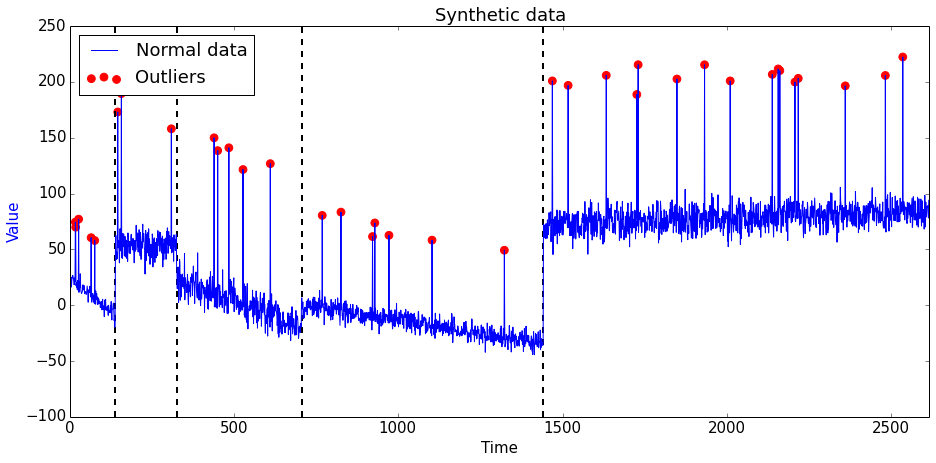

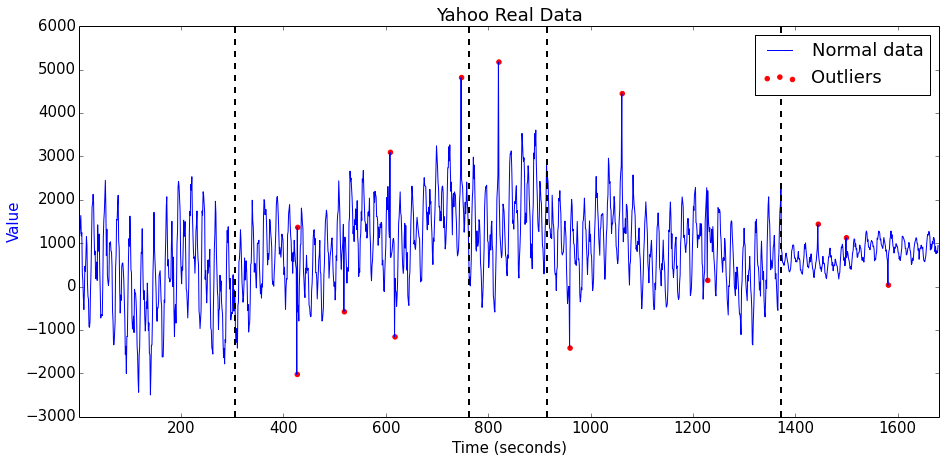

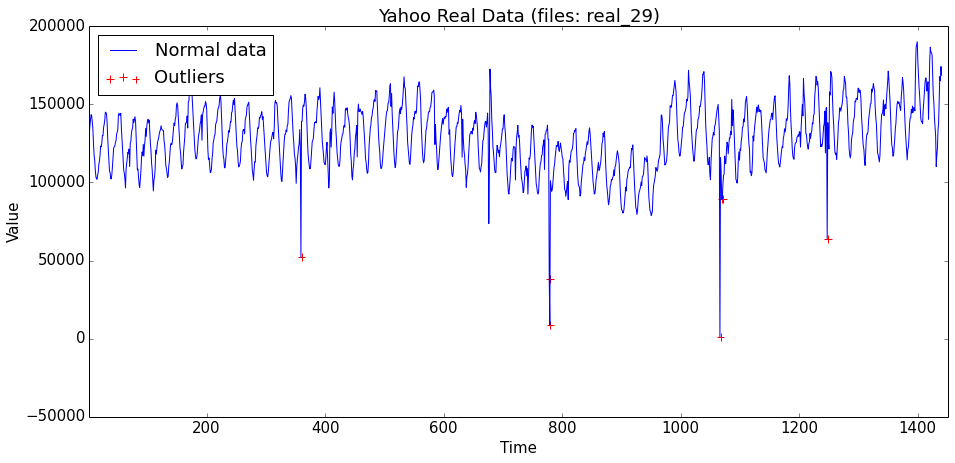

In [4]:
# load labelled data
ts_arr=[] 
tp_arr=[]
ts_flag_arr=[]
ts_cpt_arr=[]
yrange_arr=[]

dataset_names=[ "Synthetic","YSyn", "YReal"]

# ---- synthetic data ----------
tmpdf= pd.read_csv( "/home/guo/rnn_changePoint/dataset/synthetic/"+"syn_dta_trend7.csv" ,\
                   sep=',')
col = tmpdf.columns

ts = list(tmpdf[ col[0] ])
ts = [float(i)  for i in ts]
tmp_flag= list(tmpdf[ col[2] ])

cp= tmpdf[ col[1] ]
cp = list(zip(cp, range( len(ts) )))
cp_t = [  i[1]   for i in cp if i[0]==1]
cp_val = [  ts[i] for i in cp_t]

out=tmpdf[ col[2] ]
out =list( zip(out, range( len(ts) )))
out_t = [  i[1]   for i in out if i[0]==1]
out_val = [  ts[i] for i in out_t]

plot_outlier_cp( range(len(ts)), ts, out_t, out_val, cp_t,cp_val, 'Synthetic data')

ts_arr.append(ts)
ts_flag_arr.append(tmp_flag)

ts_cpt_arr.append( cp_t  )
yrange_arr.append([-100, 300]  )

# -----------------------------------------


# YAHOO SYN
tmpts, tmpts_flag, cpt = yahooSyn_load_data_plot( 77, \
                    "/home/guo/Downloads/ydata-labeled-time-series-anomalies-v1_0/"+\
                        "A4Benchmark/A4Benchmark-TS")
# 77
# 85

# YAHOO REAL


ts_arr.append(tmpts)
ts_flag_arr.append(tmpts_flag)
ts_cpt_arr.append(cpt)
yrange_arr.append([-3000, 6000]  )

# -----------------------------------------

dta_folder="/home/guo/Downloads/ydata-labeled-time-series-anomalies-v1_0/A1Benchmark/real_"
tmpts, tmpts_flag = yahoo_load_data(29, dta_folder)

ts_arr.append(tmpts)
ts_flag_arr.append(tmpts_flag)
ts_cpt_arr.append([])
yrange_arr.append([-50000, 300000]  )


Synthetic : 2615
YSyn : 1680
YReal : 1441


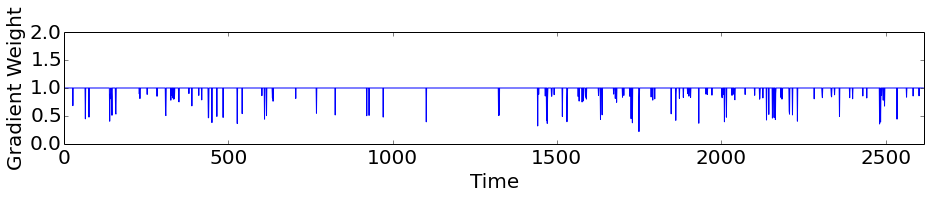

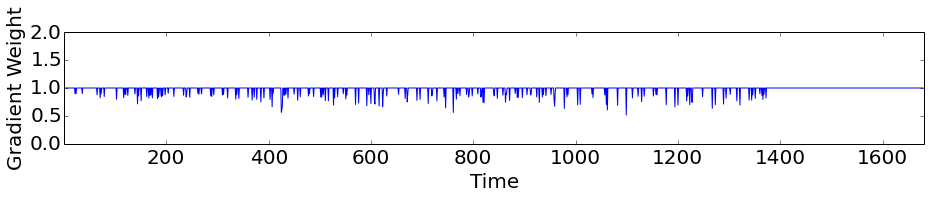

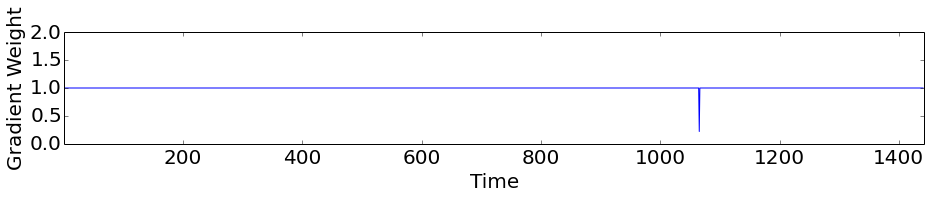

In [38]:
# plot gradient weight

dataset_names=[ "Synthetic","YSyn", "YReal"]
#                "House Power","Accelerometer", "CO2"]

ts_w=[]

for i in range( len(dataset_names) ):
    
    tmpts= pickle.load( open("../res/numeric/tdwg_w"+dataset_names[i], "rd") )
    
    tmpts= tmpts+ [1]*4
    dataset_name = dataset_names[i]
    
#     ts_w.append( tmpts+ [1]*4 )
    print dataset_names[i],":",len(tmpts)
    
    
    fig = plt.figure()
    fig.set_size_inches( (15.4,2) )

    axes = plt.gca()
    axes.set_xlim( 1, len(tmpts))
    axes.set_ylim([0,2])

    plt.plot( tmpts )
    # axes.xaxis.set_ticks( ['5m', '10m', '15m','20m'] ) 
    # axes.xaxis.set_major_locator(MaxNLocator(integer=True))
#     plt.title('Yahoo Real Data ('+'files: real_' + str(fileNo) +')')
    plt.ylabel('Gradient Weight')
    plt.xlabel('Time')
    # plt.legend( loc='upper left',fontsize=12 )
    plt.legend(loc='upper left')

    fig.savefig( '../res/figures/data_'+ dataset_name+'_w'+'.jpg', format='jpg', \
                bbox_inches='tight')
    


In [5]:
#block4: define plot function
def test_result_plot_simple(test_tstamp,testx, testy, testyh, method_name, ybound,\
                     dataset_name, save_bool, cp_tstamp, win_size, line_color):
    
    font_size=20
    
    fig = plt.figure()
    matplotlib.rcParams.update({'font.size': font_size})
    figure_size= figsize
    fig.set_size_inches( figure_size )
    
    plt.title( method_name+ " on "+ dataset_name)
#     plt.title("Online Prediction by "+ method_name+ " on "+ dataset_name)
    plt.ylabel('Value',fontsize=font_size)
    plt.xlabel('Time',fontsize=font_size)

    plt.plot( test_tstamp, testyh, label='Prediction', color=line_color, linewidth=1.8)
#     plt.scatter( test_tstamp, testy, label='Truth', marker='.', color='green',\
#                s=60)


#     plt.scatter( list(outlier_tdf['timestamp']),list(outlier_tdf['value']), color='red',\
#              label='Outliers')

    if len(cp_tstamp) >0:
        tmpcp= [ i  for i in cp_tstamp]
        for i in tmpcp:
            plt.axvline(x=i, color='k',ls='dashed', linewidth=2.0)

    
    plt.legend( loc='upper left',fontsize=25 )

    axes = plt.gca()
    axes.set_xlim([1, len(testx)+10])
    
    if len(ybound)!=0:
        axes.set_ylim([ ybound[0],ybound[1] ])

    cnt= len(testy)

    nmse = sqrt(sum([(testy[i]- testyh[i])*(testy[i]- testyh[i]) \
                     for i in range(cnt)])*1.0/cnt)
    print 'Normalzied MSE using '+ method_name + ' on '+ dataset_name + ': ', nmse

    if save_bool == True:
        fig.savefig('../res/figures/'+method_name+'-'+dataset_name+'.jpg',\
                format='jpg', bbox_inches='tight')
    
    return nmse

Normalzied MSE using RLSTM on YReal:  10460.5859952


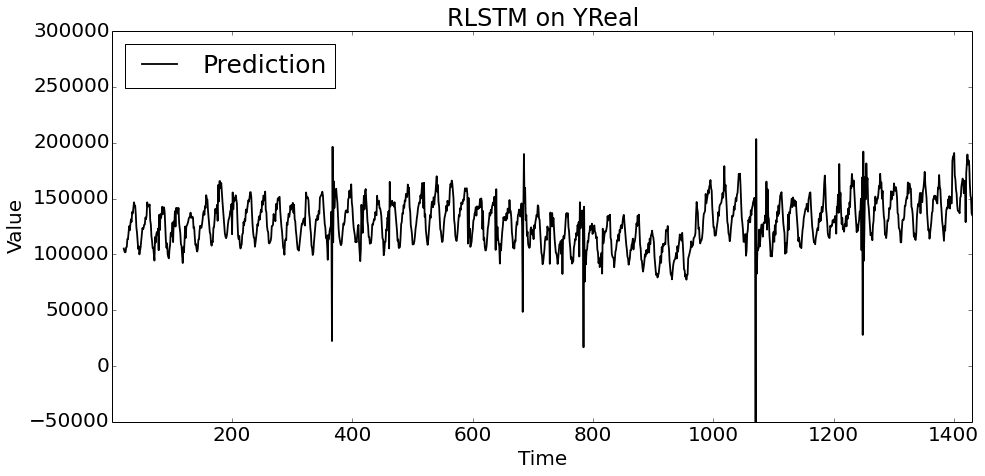

In [6]:
winsize=20
dataset_idx=2
    
tmpx=pickle.load( open("../res/rl_yr_x"+dataset_names[dataset_idx], "rd") )
tmpy=pickle.load( open("../res/rl_yr_y"+dataset_names[dataset_idx], "rd") )
tmppy=pickle.load( open("../res/rl_yr_py"+dataset_names[dataset_idx], "rd") )
tmpt= range(len(tmpx))
tmpt= [  i+ winsize for i in tmpt]
    
tmpmse=test_result_plot_simple(tmpt, tmpx, tmpy, tmppy, "RLSTM" , yrange_arr[dataset_idx],\
                 dataset_names[dataset_idx],True,ts_cpt_arr[dataset_idx], winsize, 'k')

Normalzied MSE using WG-learning on Synthetic:  9.67180705293
Normalzied MSE using RLSTM on Synthetic:  10.8914991414
Normalzied MSE using SR-LSTM on Synthetic:  9.70188770142
Normalzied MSE using ELSTM on Synthetic:  10.9298560884
Normalzied MSE using WG-learning on YSyn:  570.245605744
Normalzied MSE using RLSTM on YSyn:  507.226877625
Normalzied MSE using SR-LSTM on YSyn:  668.810314511
Normalzied MSE using ELSTM on YSyn:  653.707392428
Normalzied MSE using WG-learning on YReal:  11414.0433986
Normalzied MSE using RLSTM on YReal:  8708.83497989
Normalzied MSE using SR-LSTM on YReal:  13955.6812302
Normalzied MSE using ELSTM on YReal:  13898.1224762


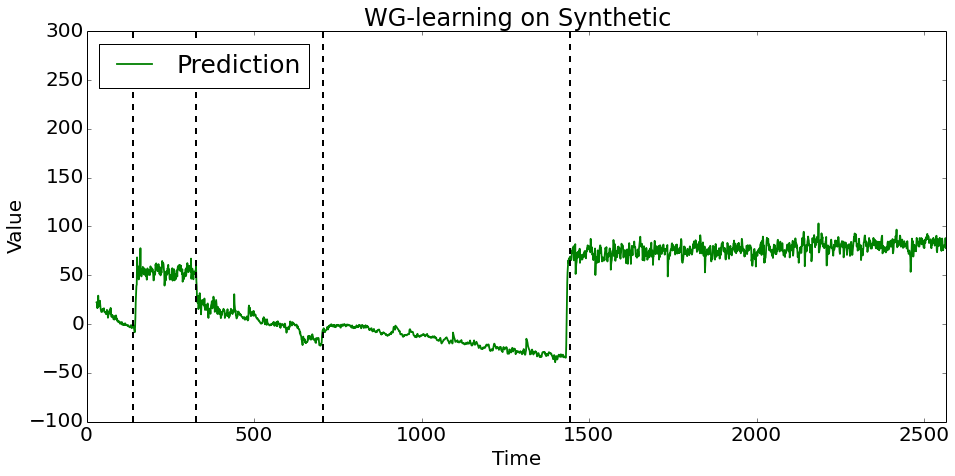

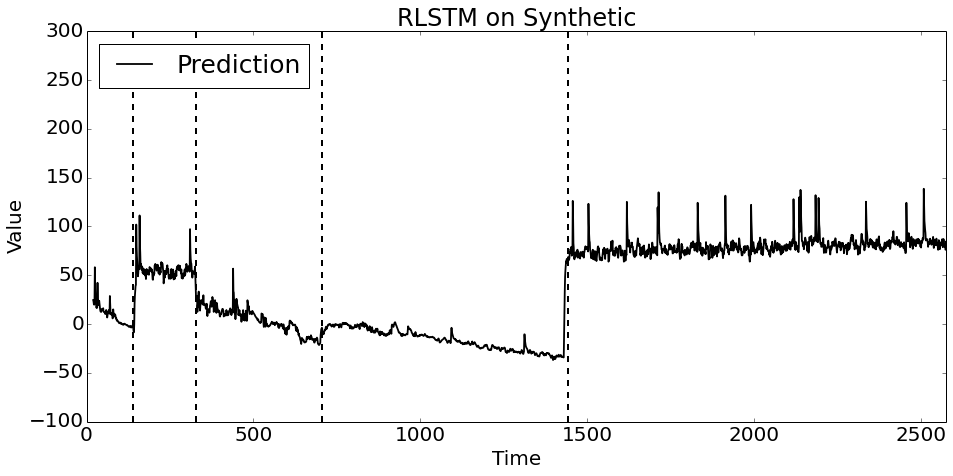

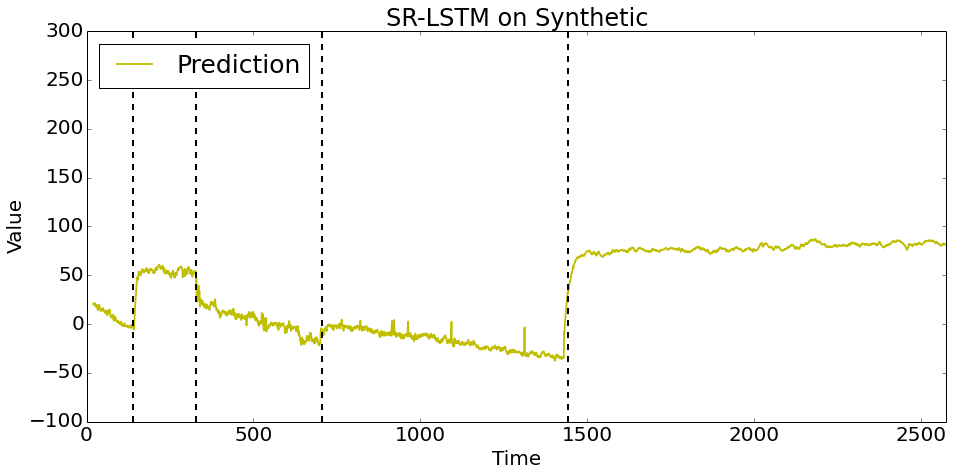

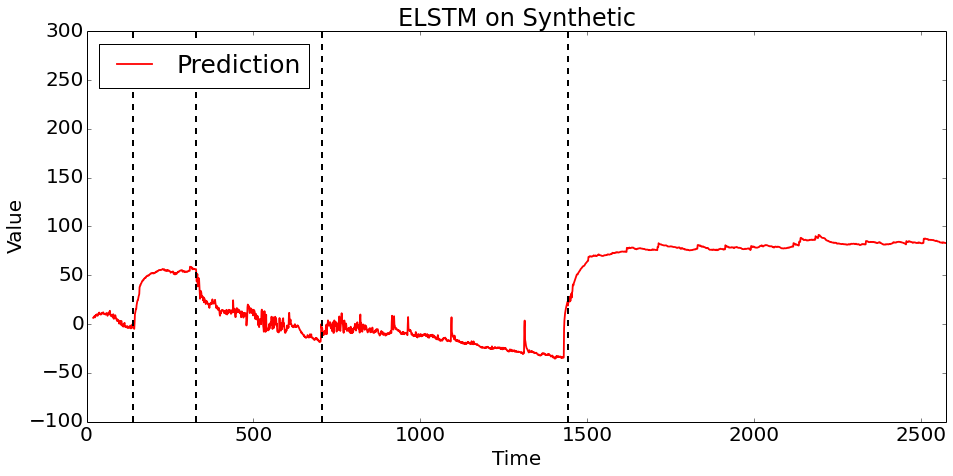

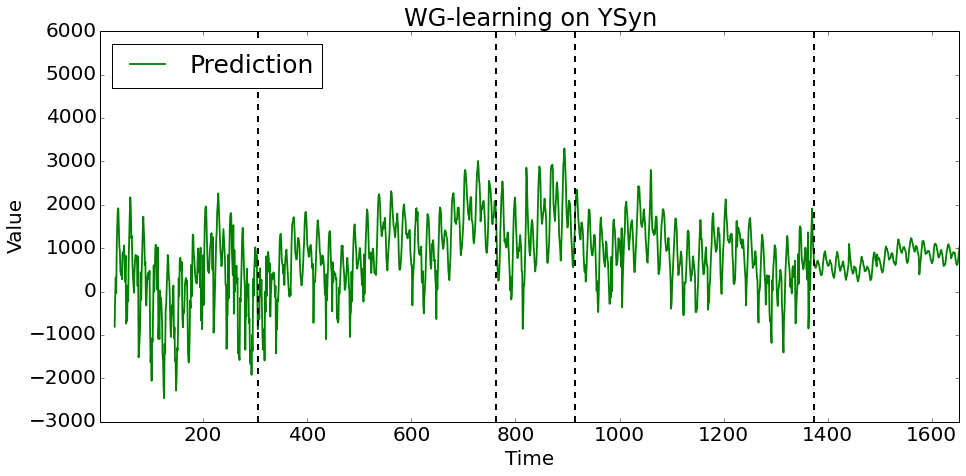

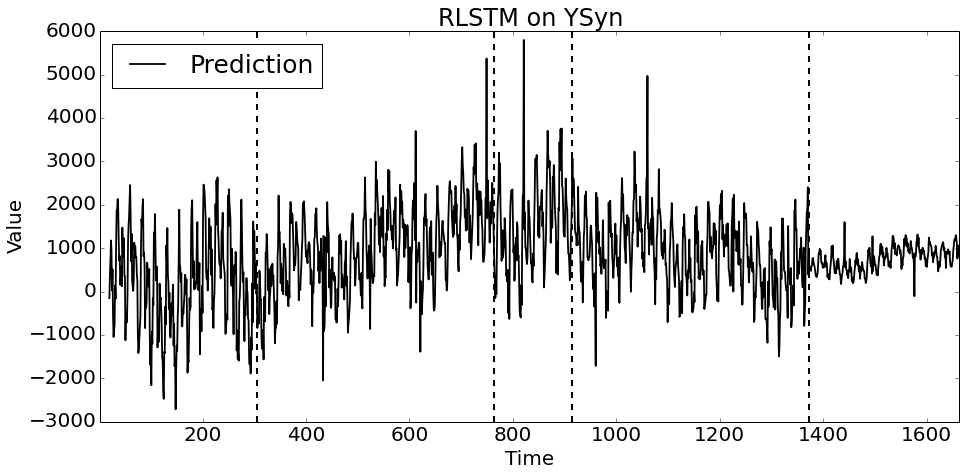

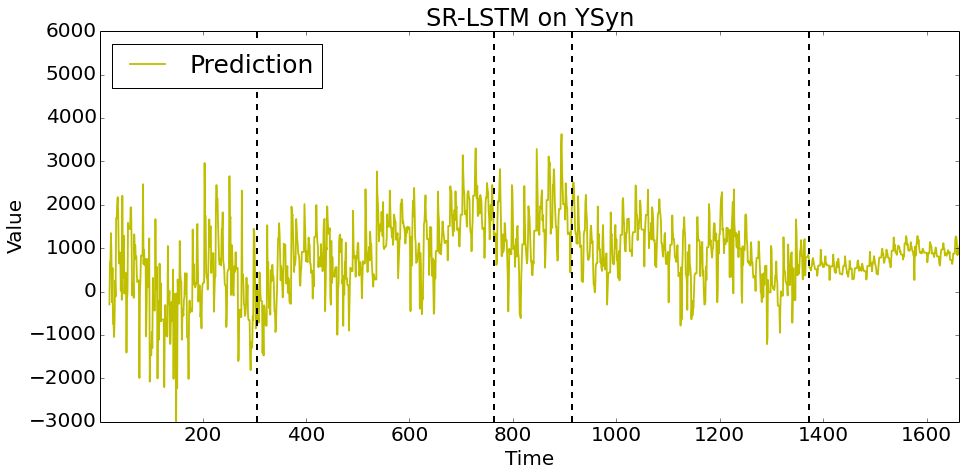

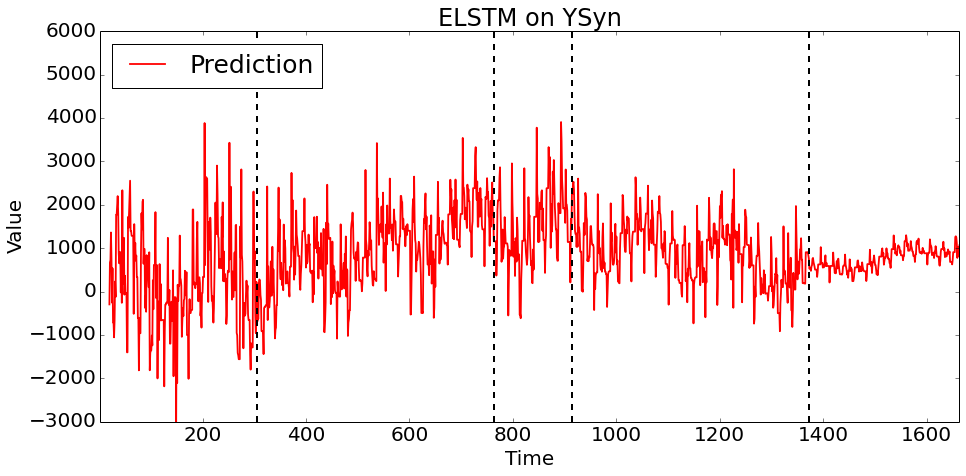

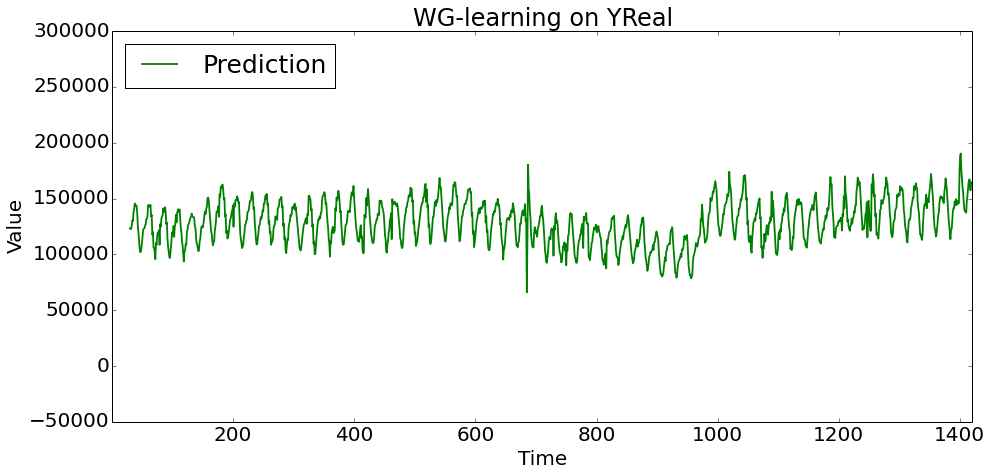

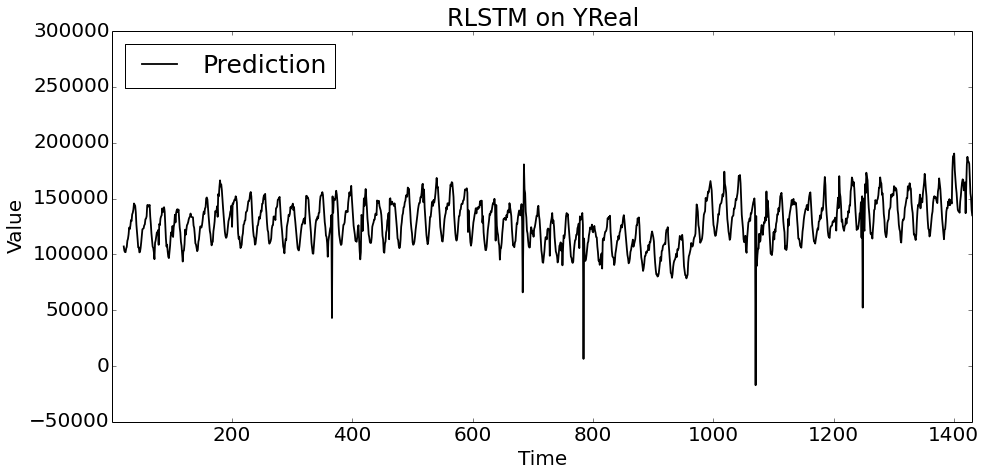

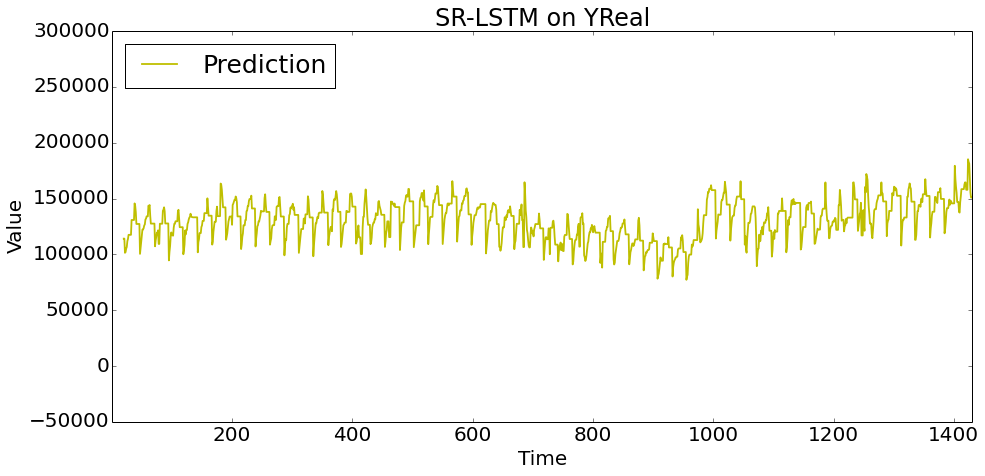

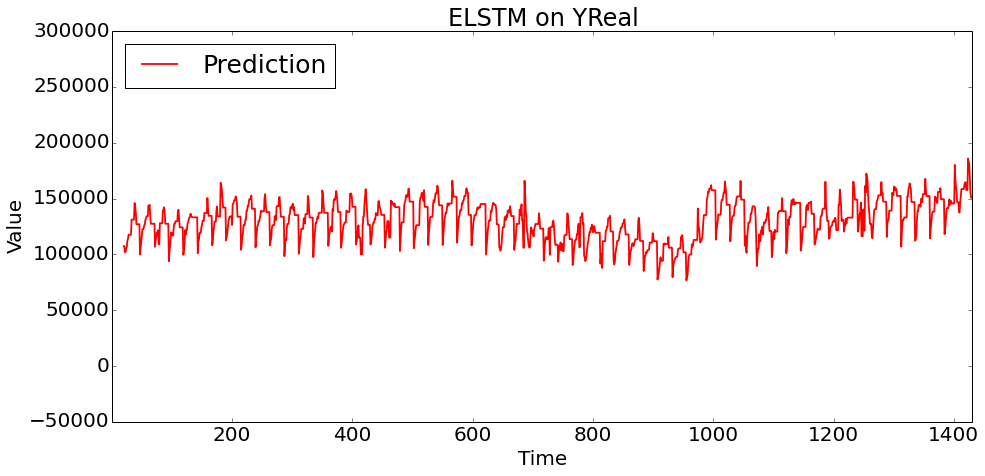

In [5]:
winsize=10
dataset_names=[ "Synthetic","YSyn", "YReal"]
#                "House Power","Accelerometer", "CO2"]

oldapp= []

ts_w=[]

for dataset_idx in range( len(dataset_names) ):
    
    winsize=30
    
    tmpx=pickle.load(open("../res/numeric/tdwg_x"+dataset_names[dataset_idx], "rd") )
    tmpy=pickle.load(open("../res/numeric/tdwg_y"+dataset_names[dataset_idx], "rd") )
    tmppy=pickle.load( open("../res/numeric/tdwg_py"+dataset_names[dataset_idx], "rd") )
    tmpt= range(len(tmpx))
    tmpt= [  i+ winsize for i in tmpt]
    

    tmpmse=test_result_plot_simple(tmpt, tmpx, tmpy, tmppy, "WG-learning" , yrange_arr[dataset_idx],\
                 dataset_names[dataset_idx],True,ts_cpt_arr[dataset_idx], winsize, 'g')
    
    winsize=20
    
    tmpx=pickle.load( open("../res/rl_yr_x"+dataset_names[dataset_idx], "rd") )
    tmpy=pickle.load( open("../res/rl_yr_y"+dataset_names[dataset_idx], "rd") )
    tmppy=pickle.load( open("../res/rl_yr_py"+dataset_names[dataset_idx], "rd") )
    tmpt= range(len(tmpx))
    tmpt= [  i+ winsize for i in tmpt]
    
    tmpmse=test_result_plot_simple(tmpt, tmpx, tmpy, tmppy, "RLSTM" , yrange_arr[dataset_idx],\
                 dataset_names[dataset_idx],True,ts_cpt_arr[dataset_idx], winsize, 'k')

    tmpx=pickle.load( open("../res/sk_yr_x"+dataset_names[dataset_idx], "rd") )
    tmpy=pickle.load( open("../res/sk_yr_y"+dataset_names[dataset_idx], "rd") )
    tmppy=pickle.load(open("../res/sk_yr_py"+dataset_names[dataset_idx], "rd") )
    tmpt= range(len(tmpx))
    tmpt= [  i+ winsize for i in tmpt]
    
    tmpmse=test_result_plot_simple(tmpt, tmpx, tmpy, tmppy, "SR-LSTM" , yrange_arr[dataset_idx],\
                 dataset_names[dataset_idx],True,ts_cpt_arr[dataset_idx], winsize,'y')

    tmpx=pickle.load( open("../res/sc_yr_x"+dataset_names[dataset_idx], "rd") )
    tmpy=pickle.load( open("../res/sc_yr_y"+dataset_names[dataset_idx], "rd") )
    tmppy=pickle.load( open("../res/sc_yr_yr"+dataset_names[dataset_idx], "rd") )
    tmpt= range(len(tmpx))
    tmpt= [  i+ winsize for i in tmpt]
    
    tmpmse=test_result_plot_simple(tmpt, tmpx, tmpy, tmppy, "ELSTM" , yrange_arr[dataset_idx],\
                 dataset_names[dataset_idx],True,ts_cpt_arr[dataset_idx], winsize, 'r')
    
    

    

In [6]:

    
# dataset_names = dataset_names2

# dataset_x=[]
# dataset_y=[]
# dataset_py=[]

# def extract_results( load_x, load_y, load_ph  ):

# for i in range( len(dataset_names) ):
    
#     dataset_x.append([])
#     dataset_y.append([])
#     dataset_py.append([])
    
#     dataset_idx=i
    
#     dataset_x[i].append(  pickle.load( open("../res/rl_yr_x" + dataset_names[dataset_idx], "rb") ) )
#     dataset_y[i].append(  pickle.load( open("../res/rl_yr_y"+dataset_names[dataset_idx], "rb") ) )
#     dataset_py[i].append( pickle.load( open("../res/rl_yr_py"+dataset_names[dataset_idx], "rb")) )
    
#     dataset_x[i].append(     pickle.load( open("../res/sk_yr_x"+dataset_names[dataset_idx], "rb") ) )
#     dataset_y[i].append(     pickle.load( open("../res/sk_yr_y"+dataset_names[dataset_idx], "rb") ) )
# #   bug
#     dataset_py[i].append(    pickle.load( open("../res/sk_yr_py"+dataset_names[dataset_idx], "rb")) )

#     dataset_x[i].append(  pickle.load( open("../res/sc_yr_x"+dataset_names[dataset_idx], "rb") ) )
#     dataset_y[i].append(  pickle.load( open("../res/sc_yr_y"+dataset_names[dataset_idx], "rb") ) )
#     dataset_py[i].append(  pickle.load( open("../res/sc_yr_yr"+dataset_names[dataset_idx], "rb") ) )

#     pickle.load(tst_w, open("../res/numeric/tdwg_w"+dataset_names[dataset_idx], "rd") )
    
#     dataset_x.append([])
#     dataset_y.append([])
#     dataset_py.append([])
    
#     dataset_x[i].append(  pickle.load( open("../res/numeric/tdwg_x"+dataset_names[i], "rd") )   )
#   bug
#     dataset_y[i].append(  pickle.load( open("../res/numeric/tdwd_y"+dataset_names[i], "rd") )   )
#     dataset_py[i].append( pickle.load( open("../res/numeric/tdwg_py"+dataset_names[i], "rd") )  )



    

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.ticker

from matplotlib import ticker
from matplotlib.ticker import Locator

figure_size= ( 80,5)
legend_font= 8.5

matplotlib.rcParams.update({'font.size': 15})

fig = plt.figure()
fig.set_size_inches(figure_size)

for dataset_idx in range( len(dataset_names) ):
    
    plt.subplot(1, 3, dataset_idx)
    tstamp =  range( winsize, winsize+ len(dataset_x[dataset_idx][0]) )
    tst_x =dataset_x[dataset_idx][0]
    tst_y = dataset_y[dataset_idx][0]
    tst_py =   dataset_py[dataset_idx][0]  
    
    test_result_plot(tstamp, tst_x, tst_y, tst_py, "TDWG" , [], \
                 dataset_names[dataset_idx], True, ts_cpt_arr[dataset_idx], winsize)


# plt.subplot(1, 3, 2)


# fig, axes = plt.subplots(nrows=4, ncols=4)
# fig.tight_layout()

# plt.subplot(4, 2, 2)
# plt.plot(x2, y2, 'r.-')
# plt.xlabel('time (s)')
# plt.ylabel('Undamped')


# plt.tight_layout(pad=0.4, w_pad=.4, h_pad=1.0)
# plt.show()

# fig.savefig('test2png.png', dpi=20)
# fig.savefig('time_height.jpeg',dpi = 600, bbox_inches='tight')
# fig.savefig('time_height.pdf', format='pdf', bbox_inches='tight')

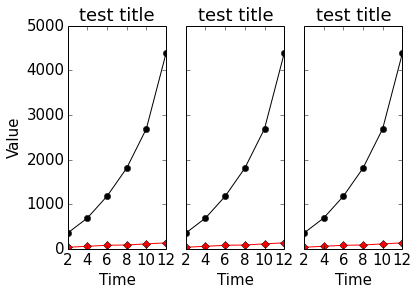

In [34]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True)

# plt.ylabel('Training time (seconds)')
# plt.xlabel('Tree depth \n (a)')
# plt.legend( loc='upper left',fontsize=5 )
plt.legend(
#     bbox_to_anchor=(0., 1.0, 1., .10),
           loc=1,
           ncol=5, mode="expand", borderaxespad=0., fontsize=legend_font , numpoints=1 )

ax1.set_title('test title')
ax1.set_ylabel('Value')
ax1.set_xlabel('Time')
ax1.plot(height, exact, 'ko-',label='ER2T')
ax1.plot(height, sh, 'rD-',label='SRT')

axes = plt.gca()
axes.set_ylim([0,5000])
# axes.xaxis.set_ticks(range(1,6))
# axes.xaxis.set_major_locator(MaxNLocator(integer=True))
# plt.title('Synthetic Data')


ax2.plot(height, exact, 'ko-',label='ER2T')
ax2.plot(height, sh, 'rD-',label='SRT')
ax2.set_title('test title')
ax2.set_xlabel('Time')

ax3.plot(height, exact, 'ko-',label='ER2T')
ax3.plot(height, sh, 'rD-',label='SRT')
ax3.set_title('test title')
ax3.set_xlabel('Time')